In [10]:
import PIL
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

from diffusers import StableDiffusionDiffEditPipeline
from diffusers import DiffusionPipeline, DDIMScheduler, DDIMInverseScheduler


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

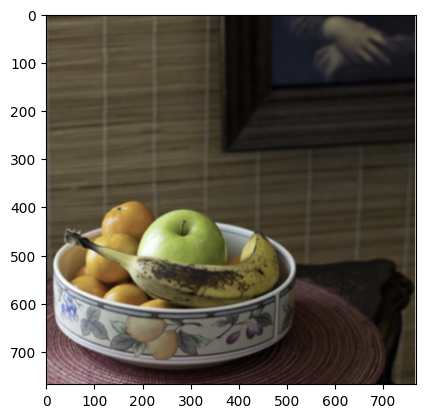

In [6]:
img_url = "https://github.com/Xiang-cd/DiffEdit-stable-diffusion/raw/main/assets/origin.png"

init_image = download_image(img_url).resize((768, 768))

plt.imshow(np.array(init_image))

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


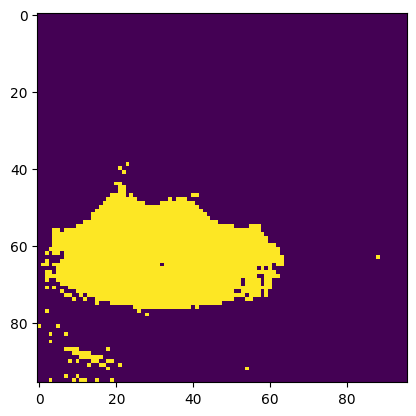

In [13]:
pipe = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.inverse_scheduler = DDIMInverseScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

mask_prompt = "A bowl of fruits"
prompt = "A bowl of pears"

mask_image = pipe.generate_mask(image=init_image, source_prompt=prompt, target_prompt=mask_prompt)

plt.imshow(np.array(mask_image).transpose(1, 2, 0))

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

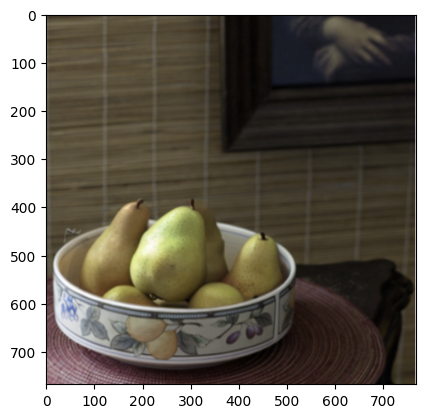

In [14]:
image_latents = pipe.invert(image=init_image, prompt=mask_prompt).latents

image = pipe(prompt=prompt, mask_image=mask_image, image_latents=image_latents).images[0]

plt.imshow(np.array(image))